Prepare the Data

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how= 'outer', on= 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice
number_mice = len(combined_df["Mouse ID"].value_counts())
number_mice

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dup_mice = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
no_dup_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = len(no_dup_mice["Mouse ID"].value_counts())
new_mice_number

248

Generate Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = no_dup_mice['Tumor Volume (mm3)'].groupby(no_dup_mice['Drug Regimen']).mean()
median = no_dup_mice['Tumor Volume (mm3)'].groupby(no_dup_mice['Drug Regimen']).median()
var = no_dup_mice['Tumor Volume (mm3)'].groupby(no_dup_mice['Drug Regimen']).var()
std = no_dup_mice['Tumor Volume (mm3)'].groupby(no_dup_mice['Drug Regimen']).std()
sem = no_dup_mice['Tumor Volume (mm3)'].groupby(no_dup_mice['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean":mean, 
                            "Median":median, 
                           "Variance":var, 
                           "Standard Deviation":std, 
                           "SEM":sem})
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_ag =  no_dup_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = no_dup_mice["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

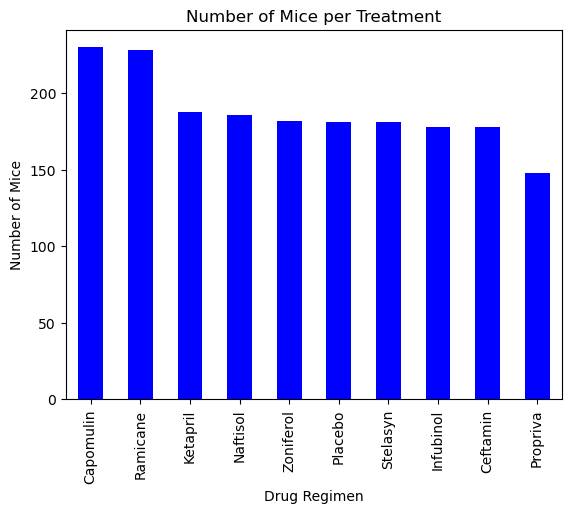

In [45]:
# Pandas bar plot 
barplot_pandas = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

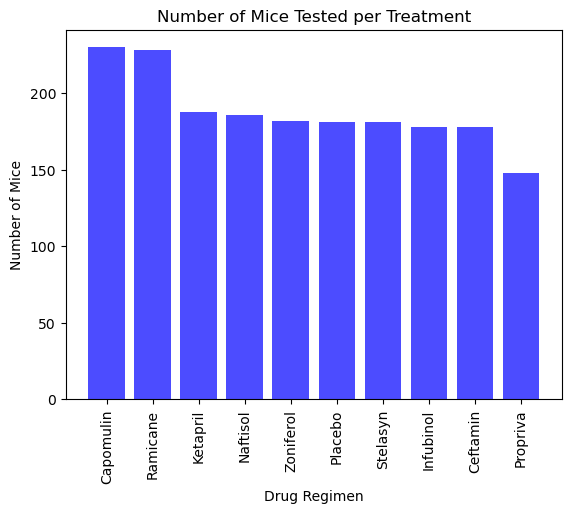

In [11]:
# Matplotlib Bar Chart
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.7, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

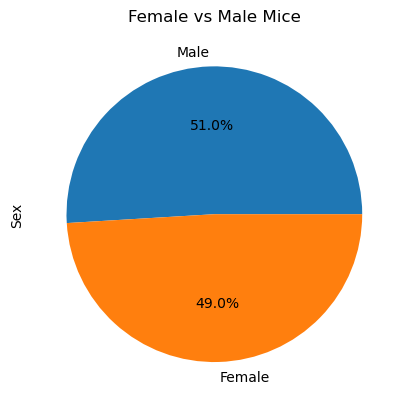

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = no_dup_mice["Sex"].value_counts()
plt.title("Female vs Male Mice")
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

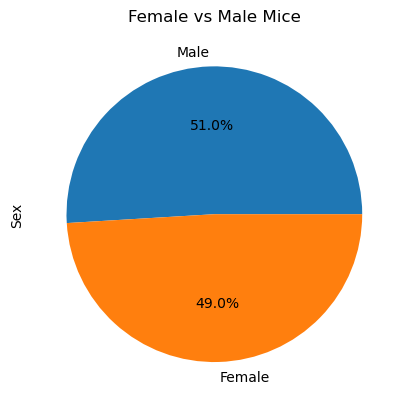

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

Calculate Quartiles, Find Outliers, and Create a Box Plot

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= no_dup_mice.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [48]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tv_last = pd.merge(last_timepoint , no_dup_mice, on=(["Mouse ID","Timepoint"]))
tv_last

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    row_drug = tv_last.loc[tv_last["Drug Regimen"] == treatment]
    tumor_vol= row_drug['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
    
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

print(f"{treatments[0]}: potential outliers could be values below {lower_bound0} and above {upper_bound0}")
print(f"{treatments[1]}: potential outliters could be values below {lower_bound1} and above {upper_bound1}")
print(f"{treatments[2]}: potential outliers could be values below {lower_bound2} and above {upper_bound2}")
print(f"{treatments[3]}: potential outliers could be values below {lower_bound3} and above {upper_bound3}")

Capomulin: potential outliers could be values below 20.70456164999999 and above 51.83201549
Ramicane: potential outliters could be values below 17.912664470000003 and above 54.30681135
Infubinol: potential outliers could be values below 36.83290494999999 and above 82.74144559000001
Ceftamin: potential outliers could be values below 25.355449580000002 and above 87.66645829999999


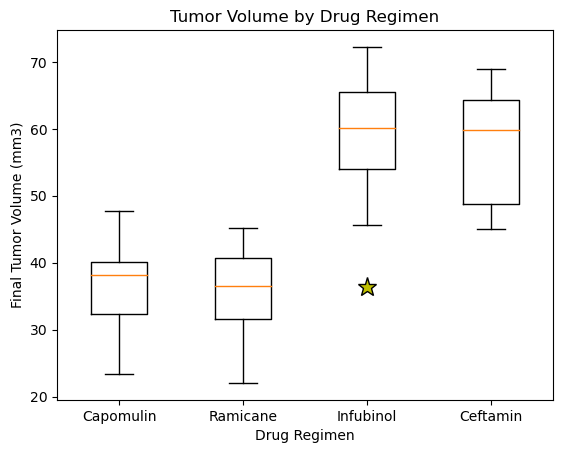

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='y', markersize=14,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()


Line Plot and Scatter Plot

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo = no_dup_mice.loc[no_dup_mice["Drug Regimen"] == "Capomulin"].value_counts("Mouse ID")
capo

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

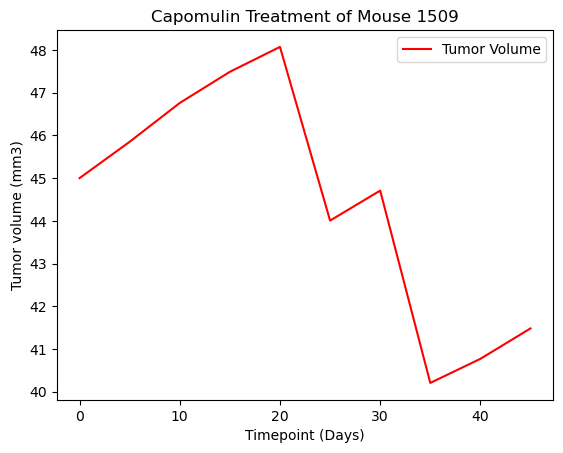

In [52]:
mouse_l509 = no_dup_mice.loc[no_dup_mice["Mouse ID"] == "l509"]

capo_y = mouse_l509["Tumor Volume (mm3)"]
capo_x = mouse_l509["Timepoint"]

plt.plot(capo_x, capo_y, color="red", label="Tumor Volume")
plt.legend(loc="best")

plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor volume (mm3)")

plt.show()

C:\Users\Thomas Gresco\AppData\Local\Temp\ipykernel_19584\3381609969.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capo_avg = capomulin_df.groupby(['Mouse ID']).mean()


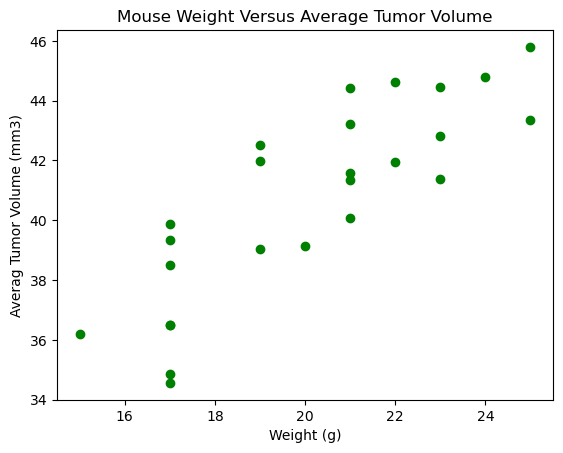

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = no_dup_mice.loc[no_dup_mice["Drug Regimen"] == "Capomulin",:]
capo_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'], color="green")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
marker_size = 14

Calculate Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


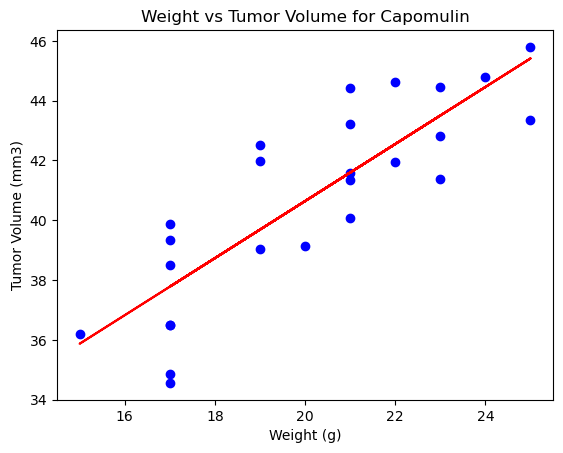

In [80]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
regress_values=capo_avg["Weight (g)"]* slope + intercept
plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"],color='b')
plt.plot(capo_avg["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()